# Цель проекта:
Нужно проанализировать данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, и выявить определяющие успешность игры закономерности.
# План:
 - Шаг 1. Открыйть файл с данными и изучить общую информацию
 - Шаг 2. Подготовить данные
 - Шаг 3. Провести исследовательский анализ данных
 - Шаг 4. Составить портрет пользователя каждого региона
 - Шаг 5. Проверить гипотезы
 - Шаг 6. Написать общий вывод

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#Изучим общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Преобразуем тип данных в наиболее подходящий
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  string 
 1   Platform         16715 non-null  string 
 2   Year_of_Release  16446 non-null  Int64  
 3   Genre            16713 non-null  string 
 4   NA_sales         16715 non-null  Float64
 5   EU_sales         16715 non-null  Float64
 6   JP_sales         16715 non-null  Float64
 7   Other_sales      16715 non-null  Float64
 8   Critic_Score     8137 non-null   Int64  
 9   User_Score       10014 non-null  string 
 10  Rating           9949 non-null   string 
dtypes: Float64(4), Int64(2), string(5)
memory usage: 1.5 MB


Датафрейм состоит из 11 столбцов, и 16715 строк. Присутсвуют пропущенные значения в некоторых столбцах, больше всего в столбцах связанных с рейтингом. Данные приведены к наиболее подходящим типам.

## Шаг 2. Подготовка данных

In [5]:
#Приведем названия столбцов к нижнему ригистру
data.columns = map(str.lower, data.columns)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,<NA>,<NA>
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,<NA>,<NA>


Проанализируем типы данных:   
столбцы name и platform приведены к типы string - действительно, это строки;  
year_of_release вместо float стал int, так как год это целое число;  
genre - строка, поэтому string;  
na_sales, eu_sales, jp_sales и other_sales остались типом float;    
critic_score приведен из типа float к int, так как все оценки данного столбца - целые числа;  
user_score приведен к string, но должен быть float, т.е нужно подробнее изучить данные столбца; 
rating обозначается буквой, поэтому string

In [6]:
#выведем на экран все значения столбца user_score
data['user_score'].unique()

<StringArray>
[  '8',  <NA>, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
   '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9', '6.4',
 '7.8', '7.5', '2.6', '7.2', '9.2',   '7', '7.3', '4.3', '7.6', '5.7',   '5',
 '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7', '5.4',   '4',
 '4.9', '4.5', '9.3', '6.2', '4.2',   '6', '3.7', '4.1', '5.8', '5.6', '5.5',
 '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5',
 '2.5', '1.9',   '3', '2.7', '2.2',   '2', '9.5', '2.1', '3.6', '2.8', '1.8',
 '3.8',   '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
 '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9',   '1', '9.7']
Length: 97, dtype: string

Среди числовых знаений присутствует также 'tbd', что означает To Be Determined, т.е будет определено. Из-за этого значения столбец не может быть приведен к типу float. Заменим эти значения на None, т.к. они еще не определены, то есть их можно считать пропущенными.

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None 

In [8]:
#Приведем значения user_score к типу float
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  Float64
 5   eu_sales         16715 non-null  Float64
 6   jp_sales         16715 non-null  Float64
 7   other_sales      16715 non-null  Float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   string 
dtypes: Float64(4), Int64(2), float64(1), string(4)
memory usage: 1.5 MB


Рассмотрим пропущенные значения побробнее во всех стобцах.

In [9]:
data['name'].unique()

<StringArray>
[                                                 'Wii Sports',
                                           'Super Mario Bros.',
                                              'Mario Kart Wii',
                                           'Wii Sports Resort',
                                    'Pokemon Red/Pokemon Blue',
                                                      'Tetris',
                                       'New Super Mario Bros.',
                                                    'Wii Play',
                                   'New Super Mario Bros. Wii',
                                                   'Duck Hunt',
 ...
                                    'Mezase!! Tsuri Master DS',
 'Eiyuu Densetsu: Sora no Kiseki Material Collection Portable',
                                     'STORM: Frontline Nation',
                                            'Strawberry Nauts',
                                                    'Plushees',
                     

In [10]:
#Выведем на экран пропущенные значения столбца name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993,<NA>,1.78,0.53,0.0,0.08,<NA>,NaN,<NA>
14244,<NA>,GEN,1993,<NA>,0.0,0.0,0.03,0.0,<NA>,NaN,<NA>


В столбце name всего два пропущенных значения, удалим их, так как много пользы они в себе не несут. Также можно заметить, что в этих данных пропущены значения genre, значит удалив эти строки мы сразу обработаем пропуски этого столбца. Эти пропуски могут объясняться какими-либо сбоями в системе, т.к. их очень мало.

In [11]:
#Удалим пропущенные значения 
data = data.loc[data['name'].notna()]

In [12]:
#Выведем на экран пропущенные значения столбца year_of_release
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.8,0.97,0.0,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.0,0.41,<NA>,NaN,<NA>
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.0,0.03,<NA>,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.0,0.0,0.0,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.0,0.0,0.0,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.0,0.0,0.0,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.0,0.0,0.0,<NA>,NaN,<NA>


Пропущенные значения столбца year_of_release заполнить искусственно нельзя, количство этих данных досточно большое, поэтому удалять мы их не можем. Пропуски могут быть обусловлены тем , что у некоторых из этих игр год релиза в названии, либо просто технической ошибкой.

Удалим данные с пропущенными занчениями в year_of_release.

In [13]:
data = data.loc[data['year_of_release'].notna()]

In [14]:
#проверяем размер датафрейма
data.shape

(16444, 11)

Пропущенные значения столбцов, отвечающих за рейтинги заменить нельзя, т.к. это будет сильно искажать данные. Пропуски могут быть объяснены тем, что игры не получали должного количества отзывов и оценок, поэтому сайты не могли выставить полноценную оценку игре.

In [15]:
data['rating'].unique()

<StringArray>
['E', <NA>, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Length: 9, dtype: string


Пропуски в стобцах user_score и critic_score оставим как есть, а у rating заменим на 'unknown'.

In [16]:
data['rating'] = data['rating'].fillna('unknown')

In [17]:
data['rating'].unique()

<StringArray>
['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']
Length: 9, dtype: string

In [18]:
#добавим новый столбец суммарных продаж во всех регионах 
data['total_sales'] = data['na_sales'].sum() + data['eu_sales'].sum() + data['jp_sales'] + data['other_sales']

In [19]:
#Проверим наличие явных дубликатов
data.duplicated().sum()

0

In [20]:
#Удалим явные дубликаты
data = data.drop_duplicates()

In [21]:
data.shape

(16444, 12)


    Проверим наличие неяных дубликатов 

In [22]:
#Приводим к нижнему регистру
data['name'] = data['name'].str.lower()
#Удаляем пробелы в начале и конце
data['name'] = data['name'].str.strip()

In [23]:
data_dupl = data.groupby('name')['platform'].count().reset_index()

In [24]:
data_dupl[data_dupl['platform'] > 1]

,name,platform
12,007: quantum of solace,6
13,007: the world is not enough,2
28,11eyes: crossover,2
34,18 wheeler: american pro trucker,2
37,187: ride or die,2
...,...,...
11407,zoo tycoon (2013),2
11415,zoocube,2
11418,zumba fitness,3
11420,zumba fitness core,2


In [25]:
data.shape

(16444, 12)

In [26]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,6753.32
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unknown,6748.68
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,6748.18
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,6747.33
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,<NA>,NaN,unknown,6752.32



Названия столбцов были приведены к нижнему регистру, все данные были преобразованы в нужные типы, были обработаны все пропуски, а также учтены явные и неявные дубликаты

In [27]:
# Код ревьюера
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,madden nfl 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,6741.33
16230,madden nfl 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,6741.1


## Шаг 3. Исследовательский анализ данных

In [28]:
#Выведем на экран сколько игр выпускались в разные годы
data_games = data.groupby('year_of_release')['name'].count().reset_index()
data_games.columns = ['Год', 'Количество игр']
data_games

,Год,Количество игр
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17



    Построим расмпределение количества выпущенных игр от года релиза с помощью столбчатой диагрмы и линейного графика.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

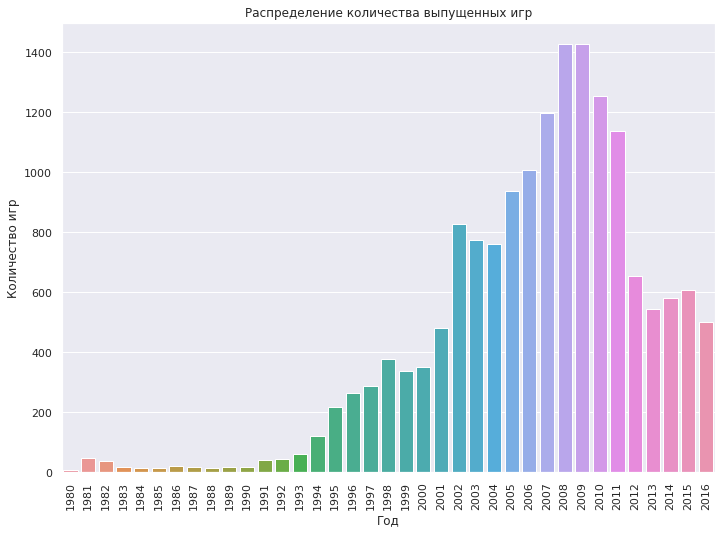

In [29]:
sns.barplot(data=data_games, x='Год', y='Количество игр').set_title('Распределение количества выпущенных игр')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Распределение количества выпущенных игр')

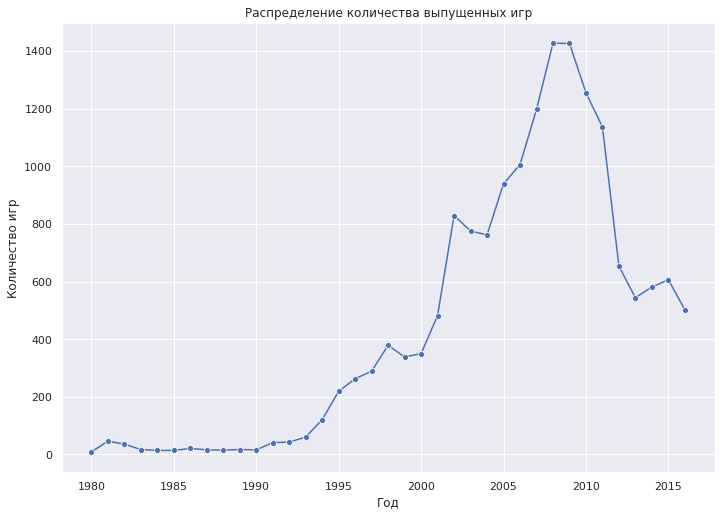

In [30]:
sns.lineplot(data=data_games, x='Год', y='Количество игр', marker='o')
plt.title('Распределение количества выпущенных игр')

In [31]:
#выведем относительное количество игр по гоодам
data['year_of_release'].value_counts(normalize=True)

2008    0.086779
2009    0.086719
2010     0.07632
2007    0.072793
2011    0.069083
2006    0.061177
2005    0.057103
2002    0.050414
2003     0.04713
2004    0.046339
2012    0.039711
2015    0.036852
2014    0.035332
2013    0.033082
2016    0.030528
2001    0.029312
1998    0.023048
2000    0.021284
1999    0.020555
1997    0.017575
1996    0.015994
1995    0.013318
1994    0.007358
1993    0.003649
1981    0.002797
1992    0.002615
1991    0.002493
1982    0.002189
1986    0.001277
1983    0.001034
1989    0.001034
1990    0.000973
1987    0.000973
1988    0.000912
1985    0.000851
1984    0.000851
1980    0.000547
Name: year_of_release, dtype: Float64

Больше всего игр выпускалось в период около 2010 года(2008, 2009, 2010) меньше всего в 1980-х. Относительное количество выпущенных игр в 1980-х и 1990-х не превышает и одного процента. Для выявления закономерностей они нам мало чем помогут, поэтому некоторыми из них можно пренебречь.


    Активный рост количества игр выпускаемых в год начался с с середины 90-х годов, это связано, в первую очередь, с увеличением количества самих пользвателей, которые могли позволить себе разные платформы. 

In [32]:
#Самые поппулярные платформы
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: Int64

In [33]:
#Продажи различных платформ
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,14338647.71
DS,14298107.16
PS3,8804090.6
Wii,8669200.59
X360,8305132.38
PSP,8042248.94
PS,8022089.47
PC,6451254.75
GBA,5467086.27


In [34]:
ps2_sales = data[data['platform'] == 'PS2'].pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
ps2_sales

,year_of_release,name
0,2000,82
1,2001,185
2,2002,280
3,2003,256
4,2004,259
5,2005,260
6,2006,259
7,2007,214
8,2008,191
9,2009,96


Text(0.5, 0, 'Год')

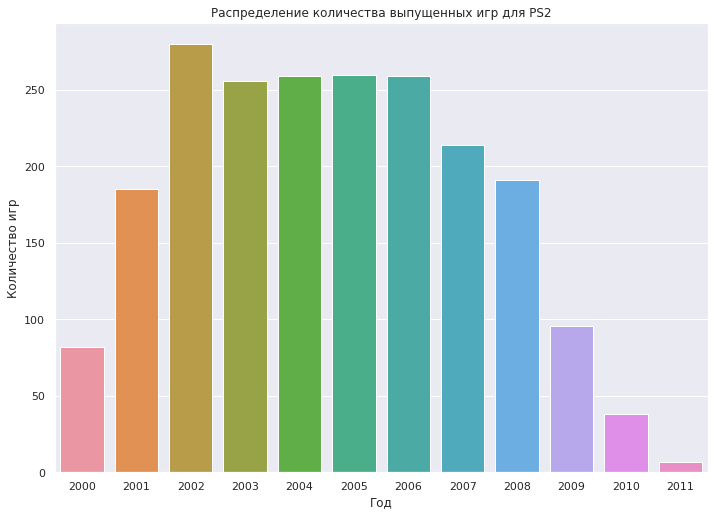

In [35]:
sns.barplot(data=ps2_sales, x='year_of_release', y='name').set_ylabel('Количество игр')
plt.title('Распределение количества выпущенных игр для PS2')
plt.xlabel('Год')

Самой популярной платформой оказалась PS2, ее график распределения продаж по годам выглядит как нормальное распределение. Пик популярности PS2 пришелся на 2003 год(более 250 млн. копий игр).

Text(0, 0.5, 'Количество игр')

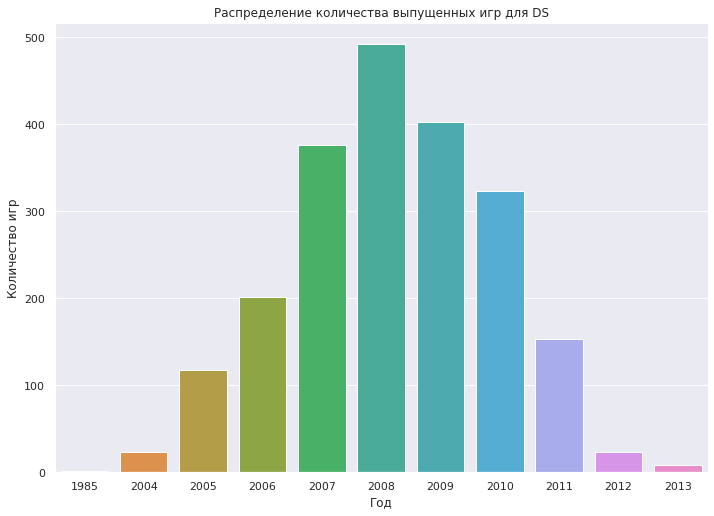

In [36]:
ds_sales = data[data['platform'] == 'DS'].pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
sns.barplot(data=ds_sales, x='year_of_release', y='name')
plt.title('Распределение количества выпущенных игр для DS')
plt.xlabel('Год')
plt.ylabel('Количество игр')

Второй самой продоваемой платформой является DS, на ней выпускались игры еще в 80х, однако свой пик популярности она набрала в 2009 году (более 700 млн. копий игр).


    Если рассмотреть график распределения количества проданных копий игр для DS, можно заметить, что характерный пик она имеет в 2000-х, а данные катирующиеся 1985 годом являются аномалией. Удалим их.

In [37]:
data = data[~((data['platform'] == 'DS') & ('year_of_release' == 1985))]

Text(0, 0.5, 'Количество игр')

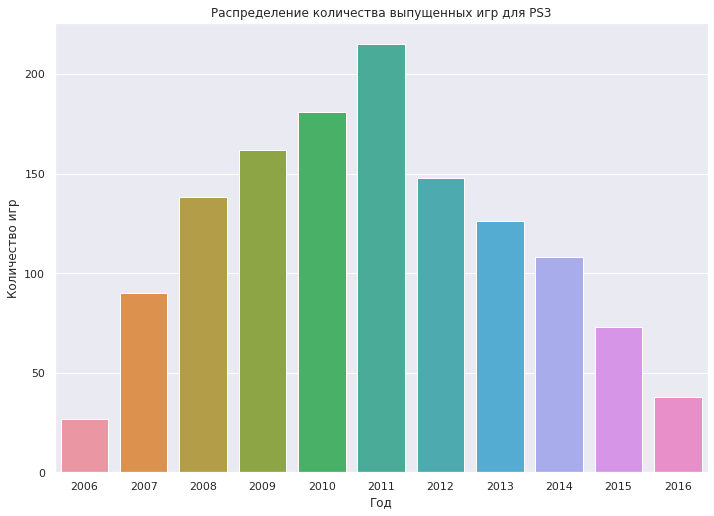

In [38]:
ps3_sales = data[data['platform'] == 'PS3'].pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
sns.barplot(data=ps3_sales, x='year_of_release', y='name')
plt.title('Распределение количества выпущенных игр для PS3')
plt.xlabel('Год')
plt.ylabel('Количество игр')

Также популярной платформой была PS3, то есть в числе лучших платформ дважды встречается PS, что говорит нам о некоторой тенденции. Наибольшие продажи игр пришлись на 2011 год, более 200 млн. копий игр.

Text(0, 0.5, 'Количество игр')

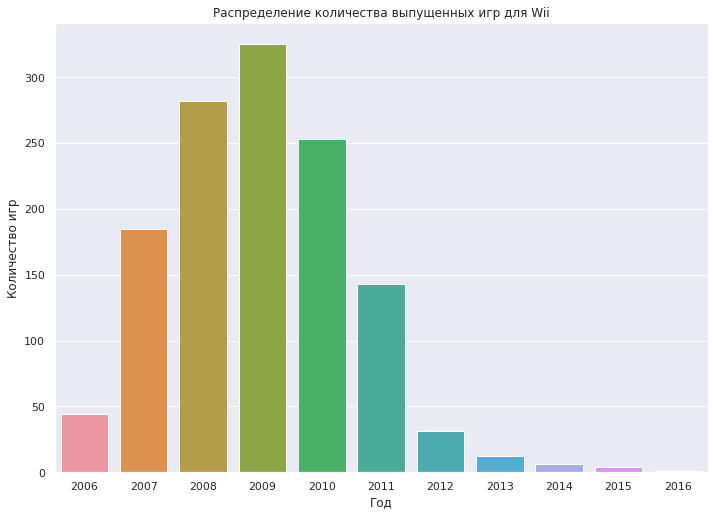

In [39]:
wii_sales = data[data['platform'] == 'Wii'].pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
sns.barplot(data=wii_sales, x='year_of_release', y='name')
plt.title('Распределение количества выпущенных игр для Wii')
plt.xlabel('Год')
plt.ylabel('Количество игр')

Платфорама Wii была популяной в 2009 году, пик продаж составлял более 300млн копий игр.

Text(0, 0.5, 'Продажи')

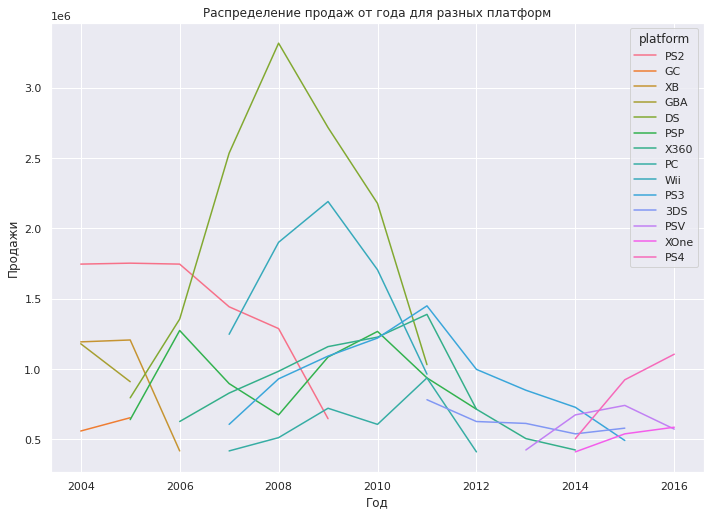

In [40]:
#продажи игр на различных платформах в разные годы
plot_data = (data.pivot_table(
    index=['platform', 'year_of_release'], 
    values='total_sales', 
    aggfunc='sum'
).sort_values(by='year_of_release')).reset_index()


sns.lineplot(data=plot_data.query('year_of_release > 2003 & total_sales > 400000'), x='year_of_release', y='total_sales', hue='platform')\
.set_title('Распределение продаж от года для разных платформ')
plt.xlabel('Год')
plt.ylabel('Продажи')

Изходя из распределений продаж  самых популярных платформ можно предположить, что в среднем чтобы добиться пика популярности платформе нужно около 3-4 лет, старые платформы исчезают в среднем за 5 лет.


Чтобы прогнозировать популярнсть платформ и игр на 2017 год нужны более актуальные данные. Возьмем данные после 2013 года.

In [41]:
games_fresh = data.query('year_of_release >= 2014')

In [42]:
data = data[data['year_of_release'] > 2013]
data.shape

(1689, 12)

Text(0, 0.5, 'Продажи')

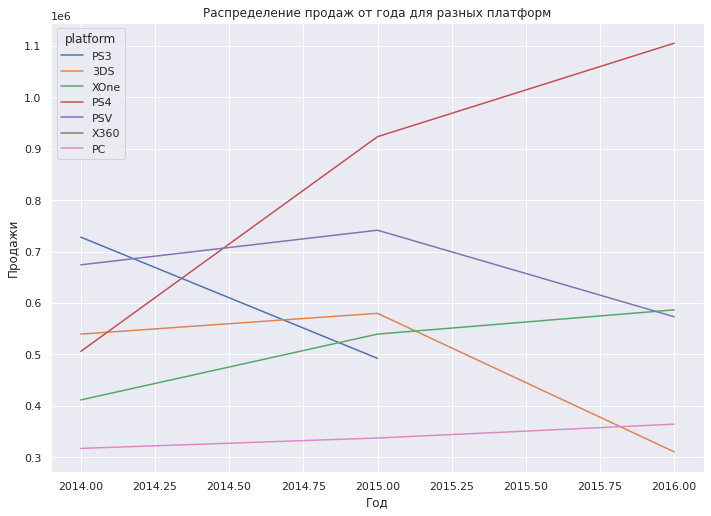

In [43]:
plot_data = plot_data[plot_data['year_of_release'] > 2013]
sns.lineplot(data=plot_data.query('total_sales > 300000'), x='year_of_release', y='total_sales', hue='platform')\
.set_title('Распределение продаж от года для разных платформ')
plt.xlabel('Год')
plt.ylabel('Продажи')


Исходя из обновленных данных, можно заметить: 
    
лидирует по продажам PSV и 3DS , но они уже прошли свой пик и идут на спад;     
    
платформа PC находится на плато;
    
новые быстрорастущие платформы PS4 и XOne - это потенциально наиболее прибыльные платформы.

Text(0, 0.5, 'Продажи')

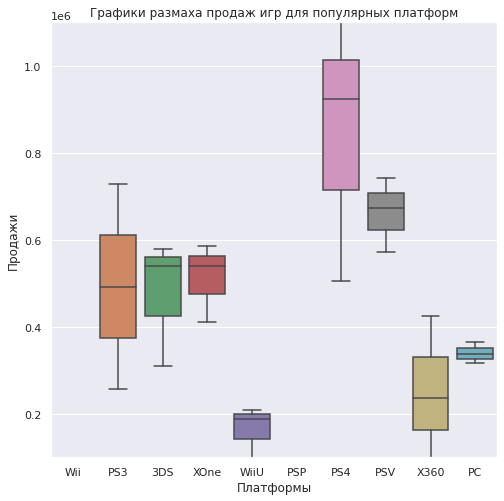

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(data=plot_data, x="platform", y="total_sales", showfliers = False,)
plt.title('Графики размаха продаж игр для популярных платформ')
plt.ylim(100000, 1100000),
plt.xlabel('Платформы')
plt.ylabel('Продажи')


График размаха продаж игр по платформам позволяет нам увидеть:  
    
самой высоким медианным значением обладает PS4 за ним идет PSV, у PS4 1 квартиль больше чем у остальных конкурентов 3ий; 
    
можно также выделить PS3, которая до сих пор имеет неплохую часть продаж;

PS4 имеет наибольшую разницу между 3 квартилем и 1, что говорит об его большом разбросе продаж;

Для нахождения влияния на продажи отзывов пользователей и критиков возьмем одну популярную платформу - PS3.


    Построим диаграммы рассеяния для нескольких платформ с использованием цикла, чтобы анализ был более углубленным и убедительным.

PS4:               critic_score  total_sales
critic_score      1.000000     0.459886
total_sales       0.459886     1.000000


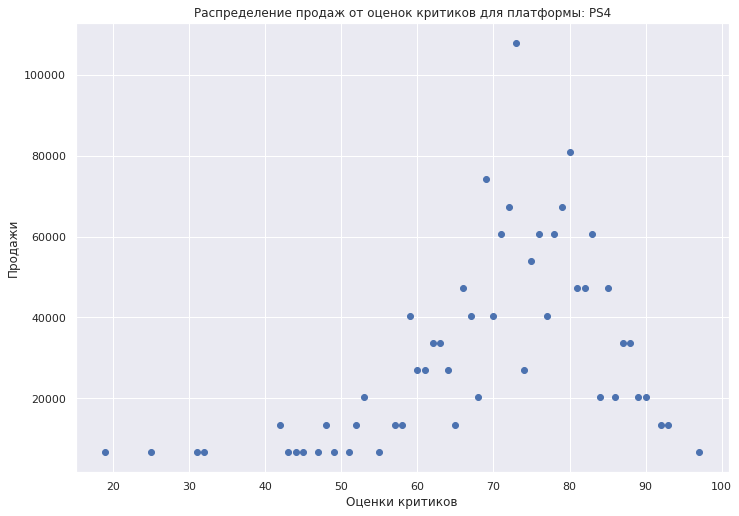

XOne:               critic_score  total_sales
critic_score      1.000000     0.452204
total_sales       0.452204     1.000000


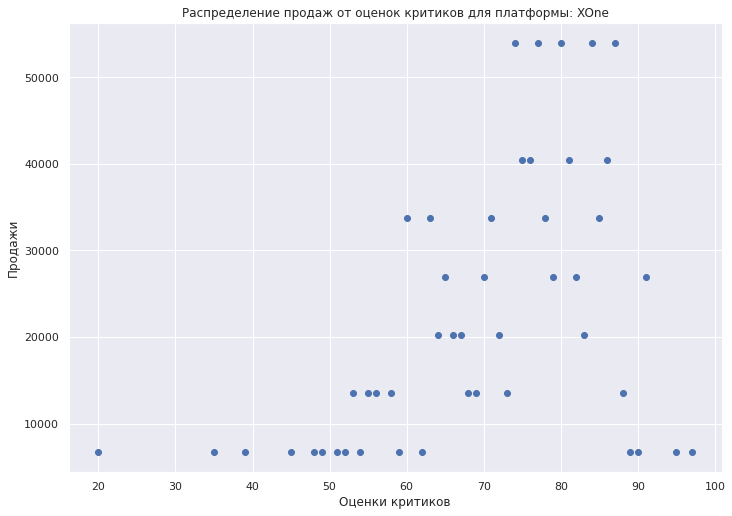

PS3:               critic_score  total_sales
critic_score      1.000000    -0.059811
total_sales      -0.059811     1.000000


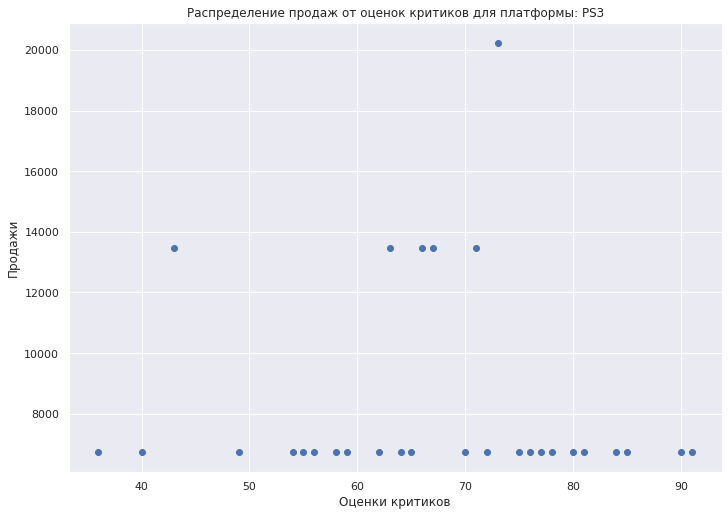

X360:               critic_score  total_sales
critic_score      1.000000     0.072452
total_sales       0.072452     1.000000


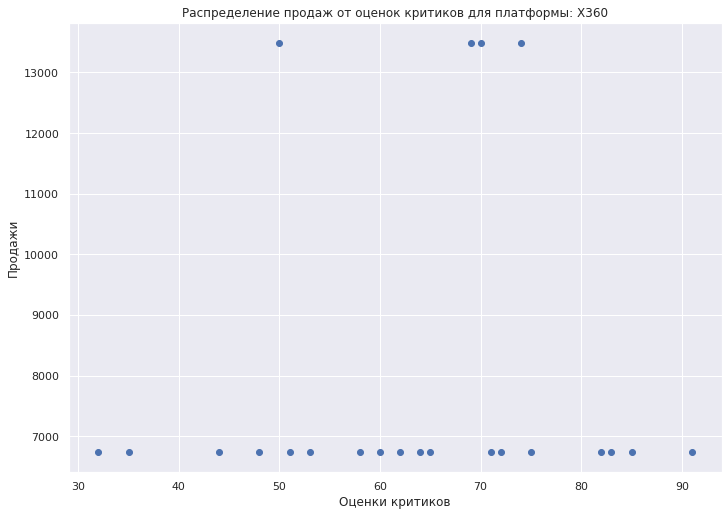

PC:               critic_score  total_sales
critic_score      1.000000     0.356623
total_sales       0.356623     1.000000


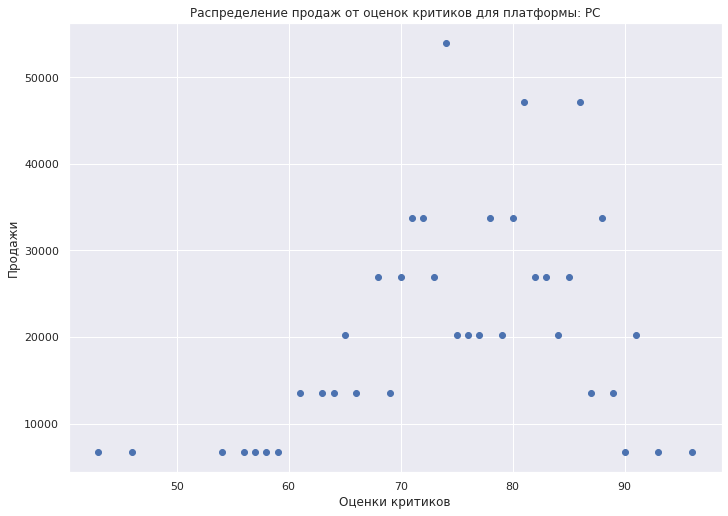

PSV:               critic_score  total_sales
critic_score       1.00000     -0.06267
total_sales       -0.06267      1.00000


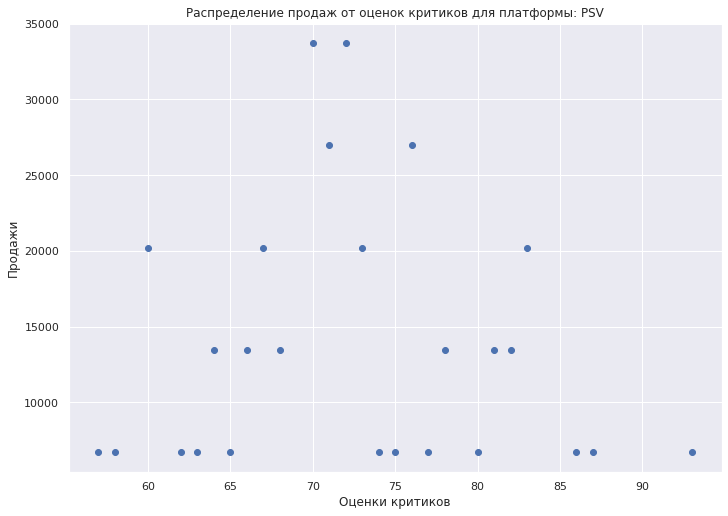

In [46]:
#Построим распределения продаж от оценок критиков
platforms = ['PS4', 'XOne', 'PS3', 'X360', 'PC', 'PSV']

for platform in platforms:
    platform_data = data.loc[data['platform'] == platform].pivot_table(index=['critic_score'], values='total_sales', aggfunc='sum').reset_index()
    print(f'{platform}: {platform_data.corr()}')
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.title(f'Распределение продаж от оценок критиков для платформы: {platform}')
    plt.show()

PS4:              user_score  total_sales
user_score     1.000000     0.572737
total_sales    0.572737     1.000000


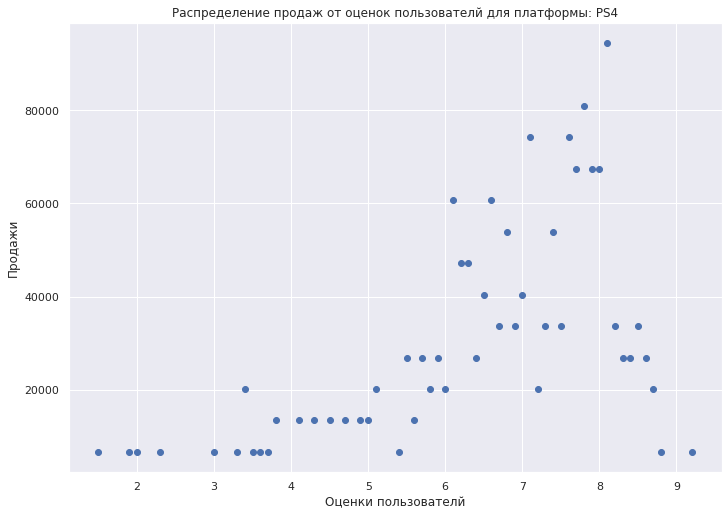

XOne:              user_score  total_sales
user_score     1.000000     0.265864
total_sales    0.265864     1.000000


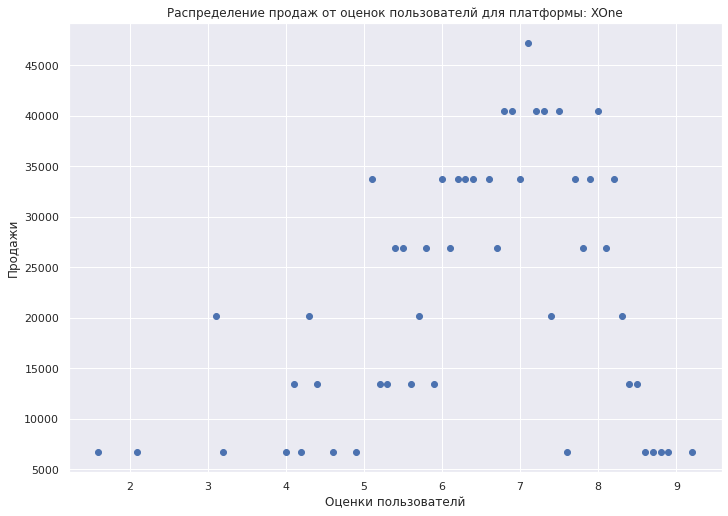

PS3:              user_score  total_sales
user_score     1.000000     0.292967
total_sales    0.292967     1.000000


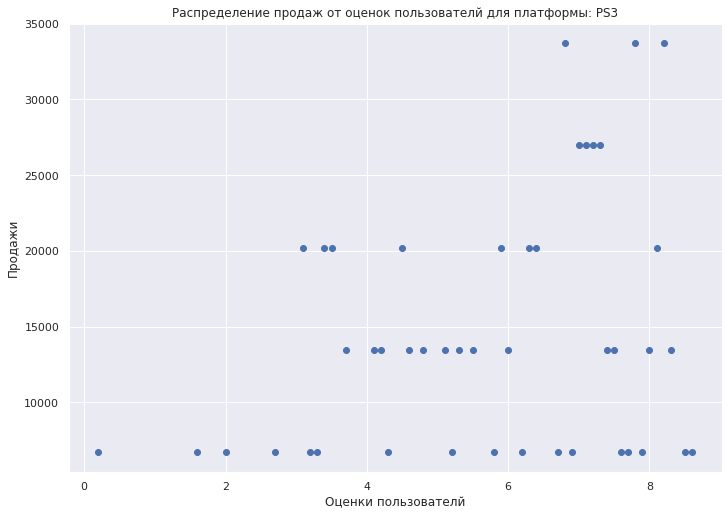

X360:              user_score  total_sales
user_score     1.000000     0.109657
total_sales    0.109657     1.000000


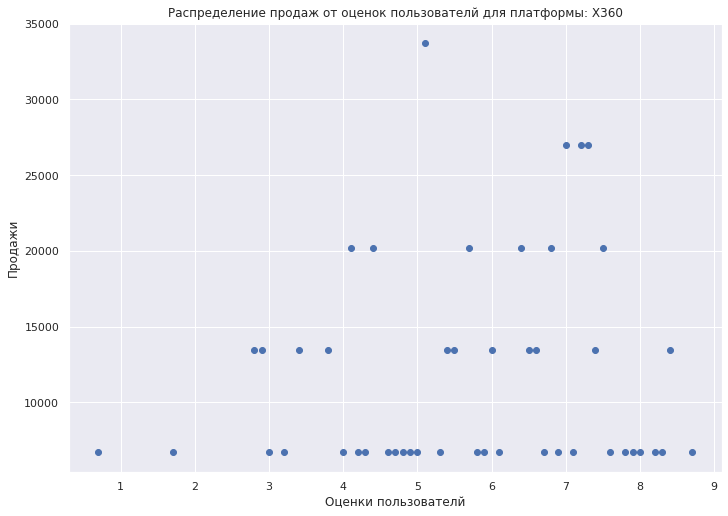

PC:              user_score  total_sales
user_score     1.000000     0.327341
total_sales    0.327341     1.000000


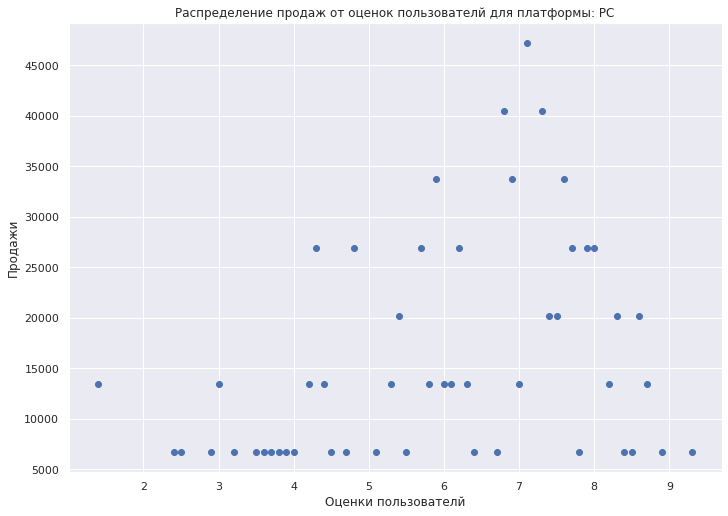

PSV:              user_score  total_sales
user_score      1.00000      0.50662
total_sales     0.50662      1.00000


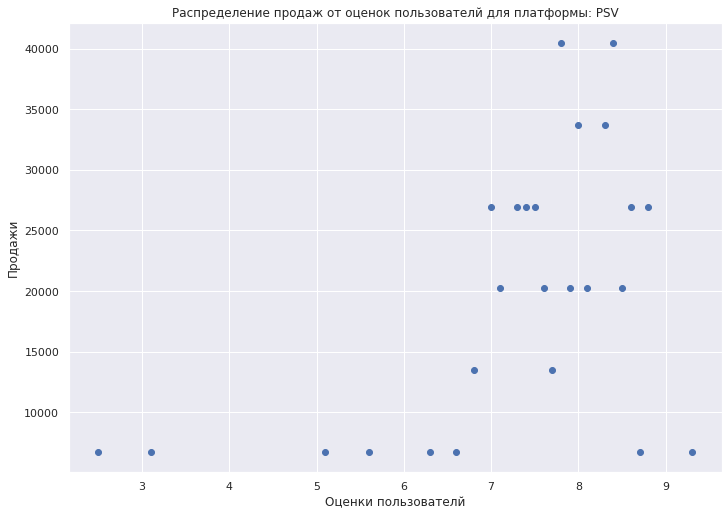

In [47]:
#Построим распределения продаж от оценок пользователей
platforms = ['PS4', 'XOne', 'PS3', 'X360', 'PC', 'PSV']

for platform in platforms:
    platform_data = data.loc[data['platform'] == platform].pivot_table(index=['user_score'], values='total_sales', aggfunc='sum').reset_index()
    print(f'{platform}: {platform_data.corr()}')
    plt.scatter(platform_data['user_score'], platform_data['total_sales'])
    plt.xlabel('Оценки пользователй')
    plt.ylabel('Продажи')
    plt.title(f'Распределение продаж от оценок пользователй для платформы: {platform}')
    plt.show()


    
Графики распределений продаж игр от оценок критиков и пользователей, получились разными для разных платформ, но присутствуют некоторые закономерности:  

если оценки критиков для игры в среднем меньше 60, то продажи игры вероятнее будут маленькими, если смотреть на оценки пользователей, то заметим такие тенденции, если средняя оценка меньше 4;
    
Самые высокие продажи катируются у игр с оценкой критиков в диапазоне от 70 до 80. Для оценок пользователей пик продаж приходится на 7 - 8;
    
У игр с высокими оценками (для критиков 90+ и для пользователей 9+) наблюдаются низкие продажи.

In [48]:
#Относительное количество игр разных жанров
data['genre'].value_counts(normalize=True)

Action          0.366489
Role-Playing    0.130847
Adventure       0.109532
Sports          0.095323
Shooter         0.075784
Misc            0.066903
Racing          0.040853
Fighting        0.035524
Simulation      0.026051
Platform        0.022499
Strategy        0.021906
Puzzle          0.008289
Name: genre, dtype: Float64

In [49]:
#Распределение игр по жанрам
data_genre = data.pivot_table(index='genre', values='total_sales', aggfunc=['count','sum', 'mean'])
data_genre.columns = ['Количество игр', 'Продажи', 'Среднее']
data_genre = data_genre.sort_values(by='Среднее', ascending=False).reset_index()
data_genre

,genre,Количество игр,Продажи,Среднее
0,Shooter,128,862887.2,6741.30625
1,Role-Playing,221,1489822.9,6741.28009
2,Fighting,60,404475.1,6741.251667
3,Platform,38,256166.3,6741.218421
4,Sports,161,1085334.72,6741.209441
5,Misc,113,761753.94,6741.18531
6,Action,619,4172793.05,6741.184249
7,Puzzle,14,94376.44,6741.174286
8,Simulation,44,296611.6,6741.172727
9,Racing,69,465140.55,6741.167391


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Role-Playing'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Platform'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

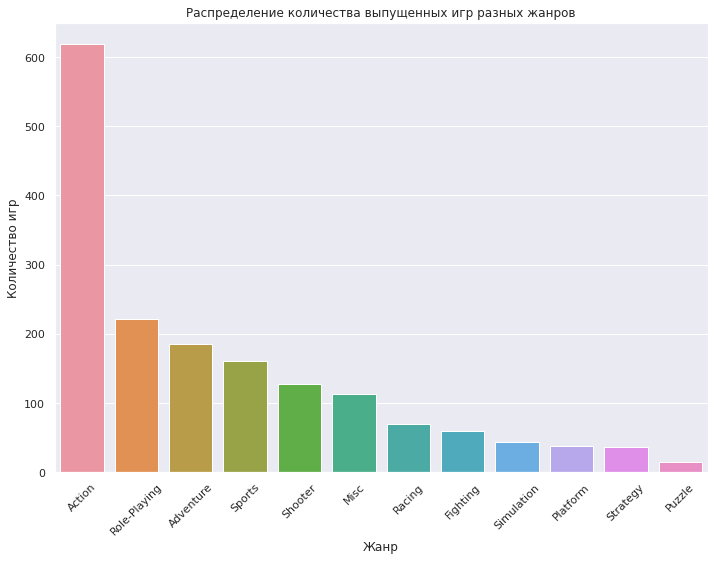

In [50]:
#Построим график распределения количества игр от жанра
sns.barplot(data=data_genre.sort_values(by='Количество игр', ascending=False), x='genre', y='Количество игр')
plt.title('Распределение количества выпущенных игр разных жанров')
plt.xlabel('Жанр')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Shooter'),
  Text(1, 0, 'Role-Playing'),
  Text(2, 0, 'Fighting'),
  Text(3, 0, 'Platform'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Puzzle'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Racing'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Adventure')])

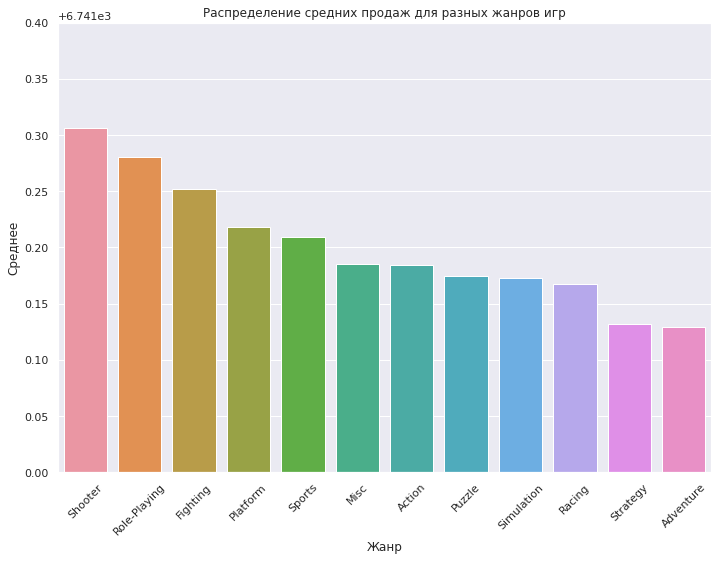

In [51]:
#Построим график распределения средних продаж для разных жанров
sns.barplot(data=data_genre, x='genre', y='Среднее')
plt.title('Распределение средних продаж для разных жанров игр')
plt.xlabel('Жанр')
plt.ylim(6741, 6741.4)
plt.xticks(rotation=45)


Построим график размаха средних продаж для разных жанров, для поиска наиболее прибыльных жанров.

In [52]:
pivot_data_genre = data.pivot_table(index=['genre', 'name'], values='total_sales', aggfunc='mean').reset_index()
pivot_data_genre

,genre,name,total_sales
0,Action,3rd super robot wars z: tengoku-hen,6741.27
1,Action,7 days to die,6741.11
2,Action,a good librarian like a good shepherd: library...,6741.13
3,Action,abunai: koi no sousa shitsu,6741.12
4,Action,adventure time: finn & jake investigations,6741.108333
...,...,...,...
951,Strategy,total war attila: tyrants & kings,6741.1
952,Strategy,total war: attila,6741.12
953,Strategy,total war: warhammer,6741.11
954,Strategy,war for the overworld,6741.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Fighting'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Puzzle'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Role-Playing'),
  Text(8, 0, 'Shooter'),
  Text(9, 0, 'Simulation'),
  Text(10, 0, 'Sports'),
  Text(11, 0, 'Strategy')])

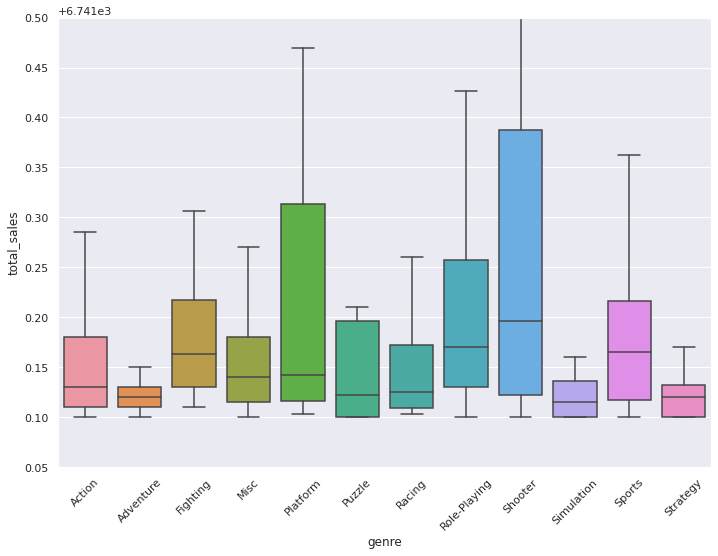

In [53]:
sns.boxplot(data=pivot_data_genre, x='genre', y='total_sales', showfliers = False)
plt.ylim(6741.05, 6741.5)
plt.xticks(rotation=45)


Самым популярным жанром яляется action с большим отрывом, наименее популярными являются puzzle и strategy. Самымыми прибыльными же являются shooter, role-playing и fighting, наименее прибыльные - strategy и adventure.


В 3м шаге был проведе исследовательский анализ. Были выбраны актуальные данные(после 2014 года), были выявлены несколько потенциально прибыльных платформ - PS4 и XOne, также были построены общие распределения по платформам и по жанрам.

## Шаг 4. Составление портрета пользователя каждого региона

In [54]:
#сводная таблица популярности различных платформ для Cеверной Америки
data_na = data[data['na_sales'] != 0.00].pivot_table(index='platform', values='na_sales', aggfunc= 'sum').reset_index().sort_values(by='na_sales', ascending=False)
data_na['na_sales'] /= data_na['na_sales'].sum()
data_na

,platform,na_sales
3,PS4,0.347145
8,XOne,0.286102
7,X360,0.099627
0,3DS,0.079701
2,PS3,0.077624
6,WiiU,0.068155
1,PC,0.025452
4,PSV,0.008871
5,Wii,0.007322


In [55]:
#самые популярные платформы для Cеверной Америки
top_5_for_na=['X360', 'PS3', 'PS4', 'XOne', '3DS']
#Создадим новый столбец чтобы заменить менее популярные платформы на 'others'
data_na['popular_platforms'] = data_na['platform'].apply(lambda x: x if x in top_5_for_na else 'others')
data_na

,platform,na_sales,popular_platforms
3,PS4,0.347145,PS4
8,XOne,0.286102,XOne
7,X360,0.099627,X360
0,3DS,0.079701,3DS
2,PS3,0.077624,PS3
6,WiiU,0.068155,others
1,PC,0.025452,others
4,PSV,0.008871,others
5,Wii,0.007322,others


In [56]:
#Создадим еще одну сводную таблицу, чтобы по ней построить график
pivot_na = data_na.pivot_table(index='popular_platforms', values='na_sales', aggfunc='sum').reset_index()
pivot_na

,popular_platforms,na_sales
0,3DS,0.079701
1,PS3,0.077624
2,PS4,0.347145
3,X360,0.099627
4,XOne,0.286102
5,others,0.109801


Text(0.5, 1.0, 'Круговая диаграмма популярных платформ для Северной Америки')

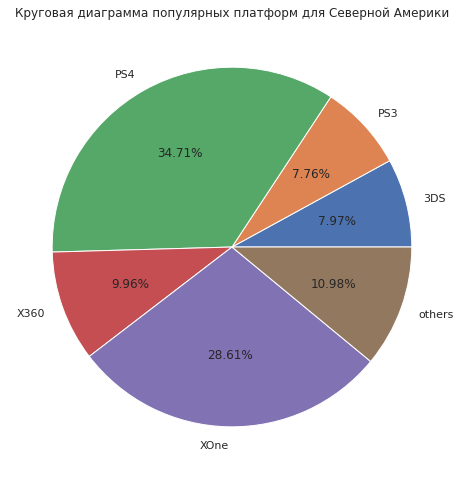

In [57]:
#Строим график популярных платформ для Северной Америки
plt.pie(
    pivot_na['na_sales'], 
    labels=pivot_na['popular_platforms'],
    autopct='%1.2f%%'
)
plt.title('Круговая диаграмма популярных платформ для Северной Америки')

<div class='alert alert-info'>
Самыми популярными платформами для Северной америки стали PS4 и XOne. С отрывом лидирует PS4 с долей 0.34, чуть менее популярная XOne - 0.28. Далее отстают от этих двух платформ X360- 0.10, 3DS - 0.08 и PS3 с долей проадж 0.07.

In [58]:
#создадим сводную таблицу популярности платформ для Европы
data_eu = data[data['eu_sales'] != 0.00].pivot_table(index='platform', values='eu_sales', aggfunc= 'sum').reset_index().sort_values(by='eu_sales', ascending=False)
data_eu['eu_sales'] /= data_eu['eu_sales'].sum()
data_eu

,platform,eu_sales
3,PS4,0.48042
8,XOne,0.170866
2,PS3,0.094355
1,PC,0.066388
0,3DS,0.059554
7,X360,0.057226
6,WiiU,0.048581
4,PSV,0.013041
5,Wii,0.009568


In [59]:
#Самые популярные платформы для Европы
top_5_eu = data_eu.nlargest(5, 'eu_sales')['platform'].tolist()
top_5_eu

['PS4', 'XOne', 'PS3', 'PC', '3DS']

In [60]:
#Создадим еще одну сводную таблицу, чтобы по ней построить график
data_eu['popular_platforms'] = data_eu['platform'].apply(lambda x: x if x in top_5_eu else 'others')
pivot_eu = data_eu.pivot_table(index='popular_platforms', values='eu_sales', aggfunc='sum').reset_index()
pivot_eu

,popular_platforms,eu_sales
0,3DS,0.059554
1,PC,0.066388
2,PS3,0.094355
3,PS4,0.48042
4,XOne,0.170866
5,others,0.128417


Text(0.5, 1.0, 'Круговая диаграмма популярных платформ для Европы')

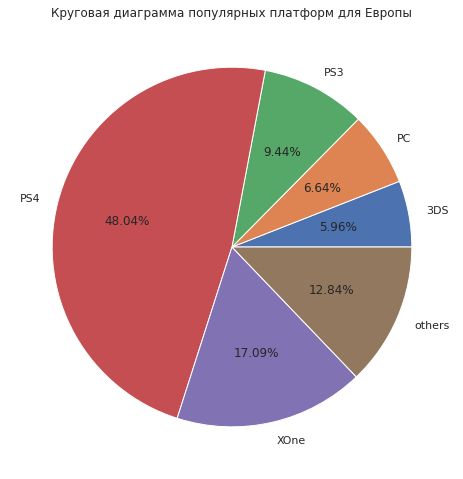

In [61]:
#Строим график популярных платформ для Европы
plt.pie(
    pivot_eu['eu_sales'], 
    labels=pivot_eu['popular_platforms'],
    autopct='%1.2f%%'
)
plt.title('Круговая диаграмма популярных платформ для Европы')

<div class='alert alert-info'>
Самымой популярной платформамой для Европы с большим отрывом стала PS4 с долей 0.48. За ней идет XOne с долей 0,17, не далеко от нее распологается PS3 с долей 0.09, менее популярны 3DS и PC - 0,06 и 0,07 соответсвенно. 

In [62]:
#создадим сводную таблицу популярных платформ для Японии 
data_jp = data[data['jp_sales'] != 0.00].pivot_table(index='platform', values='jp_sales', aggfunc= 'sum').reset_index().sort_values(by='jp_sales', ascending=False)
data_jp['jp_sales'] /= data_jp['jp_sales'].sum()
data_jp

,platform,jp_sales
0,3DS,0.475239
2,PS4,0.161349
4,PSV,0.156193
1,PS3,0.120529
5,WiiU,0.078526
3,PSP,0.003867
7,XOne,0.003438
6,X360,0.000859


In [63]:
#Самые популярные платформы для Японии
top_5_jp = data_jp.nlargest(5, 'jp_sales')['platform'].tolist()
data_jp['popular_platforms'] = data_jp['platform'].apply(lambda x: x if x in top_5_jp else 'others')
data_jp

,platform,jp_sales,popular_platforms
0,3DS,0.475239,3DS
2,PS4,0.161349,PS4
4,PSV,0.156193,PSV
1,PS3,0.120529,PS3
5,WiiU,0.078526,WiiU
3,PSP,0.003867,others
7,XOne,0.003438,others
6,X360,0.000859,others


In [64]:
#Создадим еще одну сводную таблицу, чтобы по ней построить график
pivot_jp = data_jp.pivot_table(index='popular_platforms', values='jp_sales', aggfunc='sum').reset_index()
pivot_jp

,popular_platforms,jp_sales
0,3DS,0.475239
1,PS3,0.120529
2,PS4,0.161349
3,PSV,0.156193
4,WiiU,0.078526
5,others,0.008164


Text(0.5, 1.0, 'Круговая диаграмма популярных платформ для Японии')

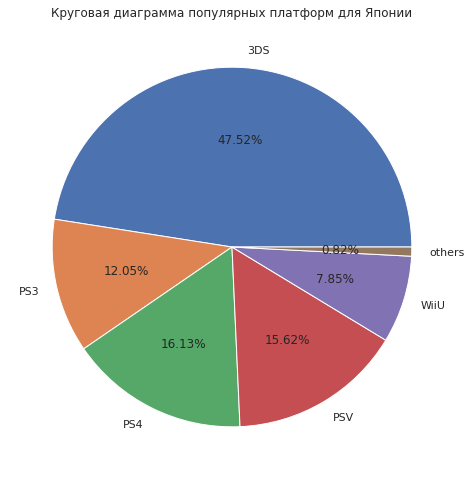

In [65]:
#Строим график популярных платформ для Японии
plt.pie(
    pivot_jp['jp_sales'], 
    labels=pivot_jp['popular_platforms'],
    autopct='%1.2f%%'
)
plt.title('Круговая диаграмма популярных платформ для Японии')

<div class='alert alert-info'>
Самой популярной платформой для Японии стала  3DS с долей 0.47, чуть менее PS4 c 0.16, далее идут PSV, PS3 и WiiU  с 0.16, 0.12 и 0.08 соответсвенно.

In [66]:
#Популярность жанров игр для Северной Америки
na_genre = data.pivot_table(index='genre', values='na_sales', aggfunc= 'sum').reset_index().sort_values(by='na_sales', ascending=False)
na_genre['na_sales'] /= na_genre['na_sales'].sum()
na_genre

,genre,na_sales
8,Shooter,0.278181
0,Action,0.255333
10,Sports,0.162395
7,Role-Playing,0.117827
3,Misc,0.052982
2,Fighting,0.043758
6,Racing,0.030768
4,Platform,0.023903
1,Adventure,0.019855
9,Simulation,0.009259


In [67]:
#Самые популярные жанры игр для Северной Америки
top_genre_na = na_genre.nlargest(5, 'na_sales')['genre'].tolist()
top_genre_na

['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc']

In [68]:
#Заменим менее популярные жанры на 'others'
na_genre['popular genres'] = na_genre['genre'].apply(lambda x: x if x in top_genre_na else 'others')
na_genre

,genre,na_sales,popular genres
8,Shooter,0.278181,Shooter
0,Action,0.255333,Action
10,Sports,0.162395,Sports
7,Role-Playing,0.117827,Role-Playing
3,Misc,0.052982,Misc
2,Fighting,0.043758,others
6,Racing,0.030768,others
4,Platform,0.023903,others
1,Adventure,0.019855,others
9,Simulation,0.009259,others


In [69]:
#Создадим еще одну сводную таблицу, чтобы по ней построить график
pivot_na = na_genre.pivot_table(index='popular genres', values='na_sales', aggfunc='sum').reset_index()
pivot_na

,popular genres,na_sales
0,Action,0.255333
1,Misc,0.052982
2,Role-Playing,0.117827
3,Shooter,0.278181
4,Sports,0.162395
5,others,0.133282


Text(0.5, 1.0, 'Круговая диаграмма популярных жанров для Северной Америки')

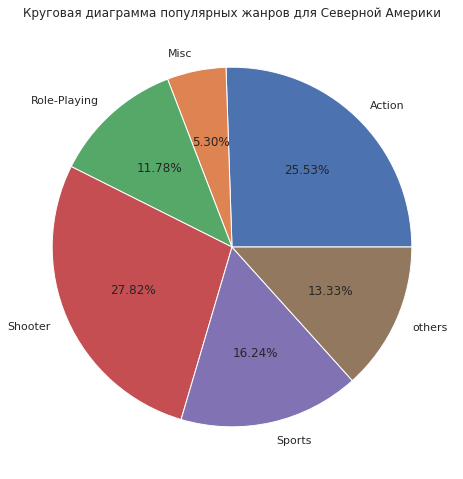

In [70]:
#Строим график популярных жанров для Северной Америки
plt.pie(
    pivot_na['na_sales'], 
    labels=pivot_na['popular genres'],
    autopct='%1.2f%%'
)
plt.title('Круговая диаграмма популярных жанров для Северной Америки')

<div class='alert alert-info'>
Для пользователей Северной Америки самыми популярными жанрами являются shooter и action 0.28 и 0.26 соответсвенно, на спортивные игры приходится 0.16, на role-playing приходится 0.12 и на misc 0.05

In [71]:
#Популярные жанры для Европы
eu_genre = data.pivot_table(index='genre', values='eu_sales', aggfunc= 'sum').reset_index()
eu_genre['eu_sales'] /= eu_genre['eu_sales'].sum()
top_genre_eu = eu_genre.nlargest(5, 'eu_sales')['genre'].tolist()
eu_genre['popular genres'] = eu_genre['genre'].apply(lambda x: x if x in top_genre_eu else 'others')
pivot_eu = eu_genre.pivot_table(index='popular genres', values='eu_sales', aggfunc='sum').reset_index()
pivot_eu

,popular genres,eu_sales
0,Action,0.275898
1,Racing,0.052202
2,Role-Playing,0.104071
3,Shooter,0.242057
4,Sports,0.168945
5,others,0.156827


Text(0.5, 1.0, 'Круговая диаграмма популярных жанров для Европы')

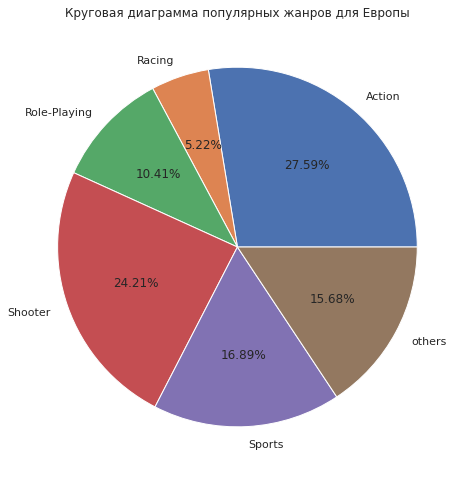

In [72]:
#Строим график популярных жанров для Европы
plt.pie(
    pivot_eu['eu_sales'], 
    labels=pivot_eu['popular genres'],
    autopct='%1.2f%%'
)
plt.title('Круговая диаграмма популярных жанров для Европы')

<div class='alert alert-info'>
Самымыми популярными жанрами для Европы являются action и shooter с долями 0.28 и 0.24 соответсвенно, довольно популярный жанр - спротивные игры 0.17, чуть мене популярны role-playing и racing с долями 0.10 и 0.05 соответсвенно

In [73]:
#Популярные жанры для Японии
jp_genre = data.pivot_table(index='genre', values='jp_sales', aggfunc= 'sum').reset_index()
jp_genre['jp_sales'] /= jp_genre['jp_sales'].sum()
top_genre_jp = jp_genre.nlargest(5, 'jp_sales')['genre'].tolist()
jp_genre['popular genres'] = jp_genre['genre'].apply(lambda x: x if x in top_genre_jp else 'others')
pivot_jp = jp_genre.pivot_table(index='popular genres', values='jp_sales', aggfunc='sum').reset_index()
pivot_jp

,popular genres,jp_sales
0,Action,0.317757
1,Fighting,0.068428
2,Misc,0.060264
3,Role-Playing,0.33473
4,Shooter,0.052315
5,others,0.166506


/tmp/ipykernel_608/718480660.py:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(


Text(0.5, 1.0, 'Круговая диаграмма популярных жанров для Японии')

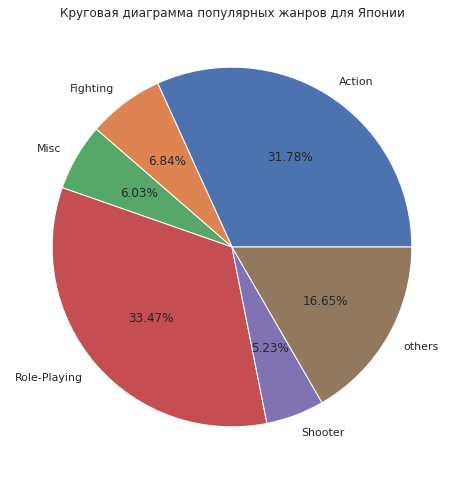

In [74]:
#Строим график популярных жанров для Японии
plt.pie(
    pivot_jp['jp_sales'], 
    labels=pivot_jp['popular genres'],
    autopct='%1.2f%%'
)
plt.title('Круговая диаграмма популярных жанров для Японии')

<div class='alert alert-info'>
Самым популярным жанром для пользователей Японии является role-playing с 0.33 долью продаж, также достаточно популярны action их доля 0.32, примерно одинаково популярны misc-0.06 доли, fighting - 0.07 и shooter с долей - 0.05

In [75]:
#влияние рейтинга ESRB на продажи в отдельном регионе
data_ESRB = data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

for column in data_ESRB.columns:
    data_ESRB[column] /= data[column].sum()
    
data_ESRB = data_ESRB.reset_index()
data_ESRB

,rating,eu_sales,jp_sales,na_sales
0,E,0.214497,0.096036,0.178624
1,E10+,0.096645,0.047911,0.116982
2,M,0.345205,0.086046,0.339435
3,T,0.125868,0.158771,0.137119
4,unknown,0.217785,0.611236,0.227839


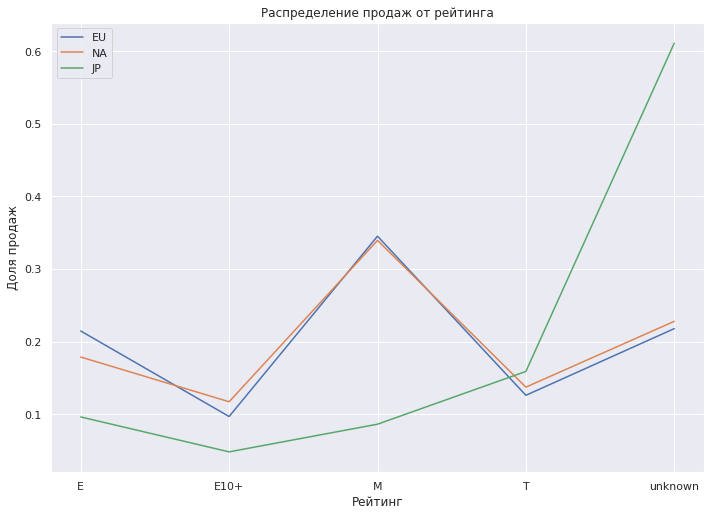

In [76]:
# создадим график распределение продаж от рейтинга
fig, ax = plt.subplots()
sns.lineplot(data=data_ESRB, x='rating', y='eu_sales', label='EU')
sns.lineplot(data=data_ESRB, x='rating', y='na_sales', label='NA')
sns.lineplot(data=data_ESRB.sort_values(by='jp_sales'), x='rating', y='jp_sales', label='JP')

ax.set_title('Распределение продаж от рейтинга')
ax.set_xlabel('Рейтинг')
ax.set_ylabel('Доля продаж')
ax.legend()


В целом графики распределениия доли продаж от рейтинга для Европы и Северной Америки почти идентичны, различаются только значениями для E (для Северной Америки чуть меньше). График же японских пользователей отличается своим более равномерным распределением по рейтингам, у него также низкая доля продаж E и E10+, на Т приходится столько же, сколько и в других регионах,  однако продажи по рейтингам M значительно ниже, чем у Европы с Северной америкой. Также можно заметить резкий скачок в данных без рейтинга ESRB, что говрит нам о том, что много игр выпускается для Японии без данного рейтинга. Делаем вывод, что рейтинг ESRB предназначен в основном для игр Северной Америки и Европы.

## Шаг 5. Проверка гипотез

Проверим гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [77]:
#Выберем данные с платформой XOne
data_XOne_score = data[(data['platform'] == 'XOne') & (data['user_score'].notna())]['user_score']
data_XOne_score.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [78]:
#Выберем данные с платформой PC
data_PC_score = data[(data['platform'] == 'PC') & (data['user_score'].notna())]['user_score']
data_PC_score.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

<div class='alert alert-info'>
Воспользуемся t-тестом для двух независимых генеральных выборок.  
    
Нулевая гипотеза: средние польользовательские рейтинги платформ Xbox One и PC равны. 
    
Альтернативная гипотеза: средние польользовательские рейтинги платформ Xbox One и PC разные.  

In [79]:
alpha = 0.05

results = st.ttest_ind(data_XOne_score, data_PC_score)

print('p-значение:', results.pvalue)
print(f'Средний рейтинг XOne: {data_XOne_score.mean()}')
print(f'Средний рейтинг PC: {data_PC_score.mean()}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.10450507919348415
Средний рейтинг XOne: 6.594545454545456
Средний рейтинг PC: 6.298360655737705
Не получилось отвергнуть нулевую гипотезу


Исходя из значений полученных t-тестом, можно сделать вывод, что у нас нет оснований опровергнуть нашу гипотезу, к тому же если посмотреть на средние значения, полученные метод describe, можно увидеть что они одинаковые.

Проверим гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.


<div class='alert alert-info'>
Воспользуемся t-тестом для двух независимых генеральных выборок.  
    
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны. 
    
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [80]:
#Выберем данные с жанром action
data_score_action = data[(data['genre'] == 'Action') & (data['user_score'].notna())]['user_score']
data_score_action.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [81]:
#Выберем данные с жарном sports
data_score_sports = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]['user_score']
data_score_sports.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [82]:
results = st.ttest_ind(data_score_action, data_score_sports)

print('p-значение:', results.statistic)
print(f'Средний рейтинг жанра action: {data_score_action.mean()}')
print(f'Средний рейтинг жанра sports: {data_score_sports.mean()}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 9.425173048948047
Средний рейтинг жанра action: 6.760606060606061
Средний рейтинг жанра sports: 5.2251968503937
Отвергаем нулевую гипотезу


По полученным данным можно увидеть, что средние оценки действительно отличаются, следовательно гипотезу опровергнуть не можем.

#### Шаг 6. Вывод

В ходе проектной работы были проанализированы данные интернет-магазина «Стримчик» и выявлены определяющие успешность игры закономерности.  

В первом шаге был считан csv-файл с данными с помощью библиотеки pandas и сохранен в датафрейм. Далее были выведены первые строки набора данных и была изучена общая информация о датафрейме.

Во втором шаге проводилась предобработка данных: названия столбцов были приведены к нижнему регистру, были проанализированы типы данных каждого столбца и преобразованы в нужные типы. Также были обработаны пропущенные значения данных, значения 'tbd'(To Be Determined) столбца user_scrore были заменены на 'None'. В конце был добавлен новый столбец с сумарными продажами во всех регионах.

В третьем шаге проводился исследовательский анализ данных: было проанализировано сколько игр выпускалось в разные годы, было простроено распределение количество игр от года. По данным выявлено, что больше всего игр выпускалось в 2008 и 2009 годах, меньше всего в 80-х.  
Далее было проанализировано изменение продаж по платформам, были выбраны платформы с наибольшими суммарными продажами и построены распределения по годам.  
Потом были отброшены неактуальные данные, т.е те которые либо будут искажать прогнозы либо не будут полезны. Акуальным периодом были выбраны даты после 2014.  
После анализа актуального периода, были выявлены потенциально прибыльные платформы - PS4 и XOne.  
Были построены диаграммы размаха по глобальным продажам игр в разбивке по платформам.  
Далее было проанализировано как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, для этого были построены распределения продаж от оценок критиков и пользователей для платформ: PS4, XOne, PS3, X360, PC и PSV , были подсчитаны корреляции между отзывами и продажами.  
Еще было проанализировано общее распределение игр по жанрам, были выявлены самые популярные жанры за актуальный период - action, role-playing и adventur, самыми прибыльными являются - shooter, role-playing и fighting.

В четвертом шаге составлялся  портрет пользователя каждого региона, для этого были исследованы самые популярные платформы и жанры игр(топ 5) для разных регионов. Были построены графики распределения доли популярных платформ и жанров для каждого региона. Также было исследовано влияние рейтинга ESRB на продажи в отдельном регионе.  
По итогам исследований можно сделать некоторые выводы по портретам пользователей каждого региона:
- Северная Америка: обычный пользователь будет играть в игры жанров action или shooter на PS4 или XOne, игры предпочтительней с рейтингом ESRB - 'E' или 'M'
- Европа: обычные пользователь предпочитает играть в action или shooter с рейтингом ESRB - 'E' или 'M' на PS4 
- Япония: среднестатистический пользователь играет в role-playing или action без рейтинга ESRB на 3DS или PS4

В пятом шаге проводилась проверка гипотез:
1. Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Полученные значения t-теста и общего анализа данных, позволили не опровергнуть эту гипотезу.
2. Средние пользовательские рейтинги жанров Action и Sports разные. Результат t-теста показал, что мы не можем опровергнуть вторую гипотезу.